# Capstone Project Notebook

# 2. Segmenting and Clustering Neighborhoods in Toronto

To this project imagine you live on the west side of the city of Toronto in Canada. You love your neighborhood, mainly because of all the great amenities and other types of venues that exist in the neighborhood, such as gourmet fast food joints, pharmacies, parks, grad schools and so on. Now say you receive a job offer from a great company on the other side of the city with great career prospects. However given the far distance from your current place you unfortunately must move if you decide to accept the offer. Wouldn't it be great if you're able to determine neighborhoods on the other side of the city that are exactly the same as your current neighborhood, and if not perhaps similar neighborhoods that are at least closer to your new job?

You can choose to compare different neighborhoods in terms of a service, search for potential explanation of why a neighborhood is popular, the cause of complaints in anothe neighborhood, or anything else related to neighborhoods. Hence the name of the capstone project will be the Battle of the neighborhoods. So what you will learn to do is given a city like the City of Toronto, you will segment it into different neighborhoods using the geographical coordinates of the center of each neighborhood, and then using a combination of location data and machine learning, you will group the neighbourhoods into clusters.

__You can prepare one notebook for all three parts, but please use Markdown to clearly label your work for each part in order to make it easy for your peers to grade your work. However, you will have to submit the notebook three times since a submission has to be associated with each question. Sorry about that.__

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository.

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1.	Start by creating a second part in the Notebook for this assignment.
2.	Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.
3. To create the above dataframe:
    - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
    - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
    - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
4. Submit a link to your Notebook on your Github repository. __(10 marks)__

__Note__: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code.

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data.

__Important Note:__ There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. __(2 marks)__

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.
Just make sure:
1.	to add enough Markdown cells to explain what you decided to do and to report any observations you make.
2.	to generate maps to visualize your neighborhoods and how they cluster together.

Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. __(3 marks)__

In [1]:
# Required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder

#importing to plot Elbow Method
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported.')

Libraries imported.


# 2.1 Obtain Table from Wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
toronto_df = pd.read_html(url)
toronto_df = toronto_df[0]

In [3]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

toronto_df = toronto_df[toronto_df.Borough != "Not assigned"] # Remove Boroughs that are 'Not assigned'

In [4]:
# More than one neighborhood can exist in one postal code area.
# These two rows will be combined into one row with the neighborhoods separated with a comma.

toronto_df["Neighbourhood"] = toronto_df.groupby("Postcode")["Neighbourhood"].transform(lambda neigh: ', '.join(neigh))

toronto_df = toronto_df.drop_duplicates()

toronto_df = toronto_df.reset_index(drop=True) # just reseting the index because I have obsessive compulsive disorder

In [5]:
# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

toronto_df['Neighbourhood'].replace("Not assigned", toronto_df["Borough"], inplace = True)

toronto_df.columns = ["PostalCode", "Borough", "Neighborhood"]

In [6]:
toronto_df.shape

(103, 3)

# 2.2 Add longitude and latitude to Data Table

In [7]:
# we need to get the latitude and the longitude coordinates of each neighborhood

geospatial_data = pd.read_csv("https://cocl.us/Geospatial_data")

In [8]:
toronto_df_ll = toronto_df.join(geospatial_data.set_index('Postal Code'), on = 'PostalCode')
# toronto_df_ll is a new data frame to not spoil the previous

In [9]:
# Rename the columns
toronto_df_ll.columns = ["PostalCode", "Borough", "Neighborhood", "Latitude", "Longitude"]

# 2.3 Explore and cluster the neighborhoods in Toronto

Use geopy library to get the latitude and longitude values of Toronto.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>canada_explorer</em>, as shown below.

In [10]:
address = 'Toronto'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [11]:
# I decide to work with only boroughs that contain the word Toronto.

df_only_toronto = toronto_df_ll[toronto_df_ll['Borough'].str.contains('Toronto')]
# df_only_toronto is a new data frame to not spoil the previous

# just reseting the index because I have obsessive compulsive disorder
df_only_toronto = df_only_toronto.reset_index(drop = True)

In [12]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, toronto_df_ll in zip(df_only_toronto['Latitude'], df_only_toronto['Longitude'],
                                            df_only_toronto['Borough'], df_only_toronto['Neighborhood']):
    label = '{}, {}'.format(df_only_toronto, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color ='#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version
the content is hidden on porpouse

In [13]:
# @hidden_cell
CLIENT_ID = 'RLMF1PEWLTCDNVPKGIJOA2QIFSL1WJYXPWUR0MGFBGSBEREP' # your Foursquare ID
CLIENT_SECRET = 'VYALR130GX51ZTLUGCDHRMQ2PFFRLJTARDWCYEVO0FAZCWCE' # your Foursquare Secret
VERSION = '20200225' # Foursquare API version

In [14]:
print('my credentials were defined successfully')

my credentials were defined successfully


# 2.4 Explore Neighborhoods in Toronto

Let's create a function to generalize venue data collection of Toronto's Neighborhoods

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now it's just to run the above function on each neighborhood and create a new dataframe called toronto_venues

In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

toronto_venues = getNearbyVenues(names = df_only_toronto['Neighborhood'],
                                 latitudes = df_only_toronto['Latitude'],
                                 longitudes = df_only_toronto['Longitude']
                                )

In [19]:
toronto_venues.shape

(1718, 7)

Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


# 2.5 Analyze Each Neighborhood

In [21]:
# one hot encoding to change to 0 and 1 venues categories separately
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# I drop this column because for some reason there is a Neighborhood Venue Category 
# that later causes some problems in groupby method
toronto_onehot.drop(["Neighborhood"], axis = 1, inplace = True)

# add neighborhood column in the first column
toronto_onehot.insert(0, "Neighborhood", toronto_venues['Neighborhood'], True)

In [22]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

Let's put the top 10 most common venues into a *pandas* dataframe. 
But firstf let's write a function to sort the venues in descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe of the top 10 venues for each neighborhood.

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

# 2.6 Cluster Neighborhoods

Run *k*-means to cluster the neighborhoods and find the best k to the model.

In [26]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Let's use the elbow method for optimal k

In [27]:
sum_of_squared_distances = []
K = range(1,35)
for k in K:
    km = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(km.inertia_)

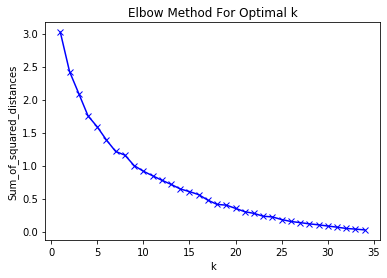

In [28]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
# set number of clusters based on Elbow Method for optimal k
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters).fit(toronto_grouped_clustering)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_only_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Finally, let's visualize the resulting clusters

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters